In [4]:
import numpy as np
arr=np.random.randint(1,101,(10,10))
main_diag=np.diag(arr)
print(main_diag)
sec_diag= np.sum(np.diag(np.fliplr(arr)))
print(sec_diag)
row_max=np.max(arr,axis=0)
print(row_max)
cl_min=np.min(arr,axis=1)
print(cl_min)
rotated_180=np.rot90(arr,2)
print(rotated_180)

[40  2 84 59 87 10 39  2  7 54]
542
[88 96 87 95 88 92 93 95 92 97]
[ 1  2 13 14  8  8 26  1  7  1]
[[54 90 44 39  9 49  1 46 76  6]
 [52  7 95 63 86 75 79 75 75 88]
 [ 1  4  2 51 64  4 76 74 60 56]
 [26 92 71 39 34 84 30 67 33 29]
 [97 53  8 93 10 88 92 87 96 69]
 [65 45 60 56 92 87  8 49 87 25]
 [24 61 14 16 85 73 59 27 25 55]
 [20 92 62 27 33 39 13 84 28 19]
 [14 69  7 44 86 35 43  6  2  6]
 [30 59 40 34  1  7 95 61 74 40]]


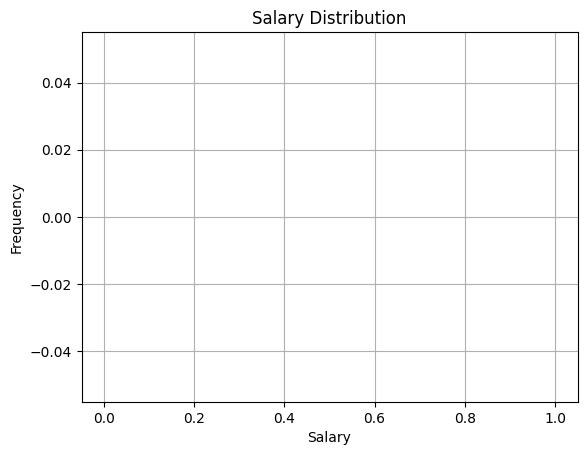

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n = 500
age = np.random.randint(18, 66, n)
salary = np.random.randint(20000, 150001, n)


purchased = np.random.choice(
    [0, 1, "yes", "no", "?"],
    size=n,
    p=[0.4, 0.4, 0.08, 0.08, 0.04]
)


df = pd.DataFrame({
    "Age": age,
    "Salary": salary,
    "Purchased": purchased
})

df=df[df["Purchased"].isin([0,1])]

def salary_level(s):
  if s<50000:
    return "Low"
  elif 50000 <= s <= 100000:
    return "Medium"
  else:
    return "High"
df["Salary_Level"]=df["Salary"].apply(salary_level)
df.shape



plt.figure()
plt.hist(df["Salary"], bins=20)
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Salary Distribution")
plt.grid(True)
plt.show()





Confusion Matrix:
 [[146   1]
 [  0 153]]
Accuracy: 0.9966666666666667


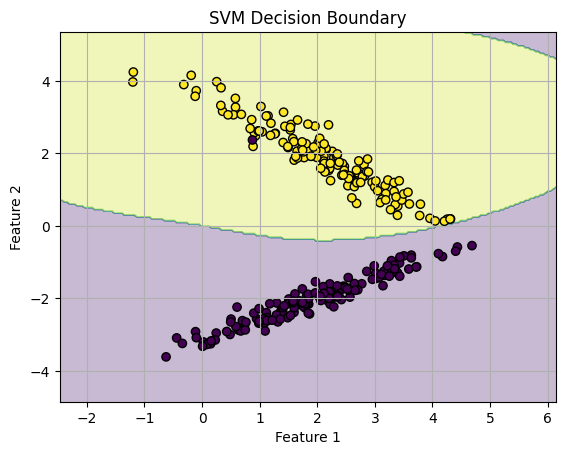

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2.0,
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)


model = SVC(kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="black")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary")
plt.grid(True)
plt.show()



Predicted y for x=7: 954.5732276901255


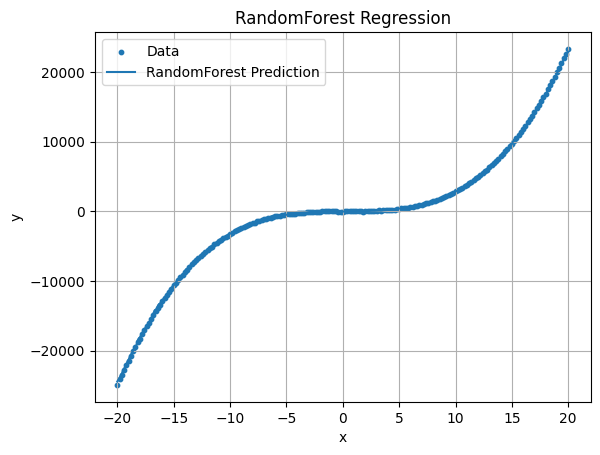

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


np.random.seed(42)
x = np.arange(-20, 20.2, 0.2)
noise = np.random.uniform(-50, 50, x.shape)
y = 3*x**3 - 2*x**2 + 5*x + noise
X = x.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
model.fit(X_train, y_train)
y_7 = model.predict([[7]])[0]
print("Predicted y for x=7:", y_7)
x_plot = np.linspace(x.min(), x.max(), 400).reshape(-1, 1)
y_pred_plot = model.predict(x_plot)

plt.figure()
plt.scatter(x, y, s=10, label="Data")
plt.plot(x_plot, y_pred_plot, label="RandomForest Prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.title("RandomForest Regression")
plt.grid(True)
plt.legend()
plt.show()


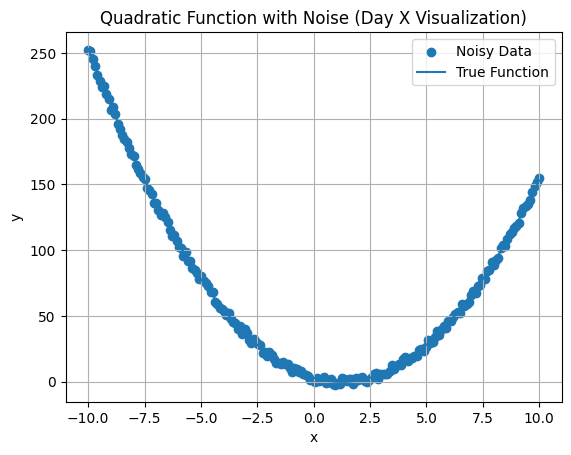

In [26]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
x = np.linspace(-10, 10, 200)
noise = np.random.uniform(-3, 3, x.shape)

y_true = 2*x**2 - 5*x + 3
y_noisy = y_true + noise


plt.figure()
plt.scatter(x, y_noisy, label="Noisy Data")
plt.plot(x, y_true, label="True Function")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Quadratic Function with Noise (Day X Visualization)")
plt.legend()
plt.grid(True)
plt.savefig("plot_dayX.png")
plt.show()
